# Parcial Práctico Machine Learning 2025-10

# Punto 3. Análisis Exploratorio de Datos (EDA) para Regresión

In [4]:
# Importar librerías necesarias
import pandas as pd

# Cargar el dataset
df = pd.read_csv("datos_parcial.csv")

# Vista previa del dataset
df.head()

HORA (UTC)  VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))  \
0      12:00                                    0.809017   
1      13:00                                    0.965926   
2      14:00                                    0.891007   
3      15:00                                    0.848048   
4      16:00                                    0.224951   

   VENTO, VELOCIDADE HORARIA (m/s)  UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)  \
0                              1.8                                      69.0   
1                              2.7                                      62.0   
2                              2.0                                      56.0   
3                              2.5                                      52.0   
4                              2.4                                      50.0   

   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)  \
0                                      60.0   
1                                      55.0   
2                                      50.0   
3                                      44.0   
4                                      43.0   

   TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)  \
0                                            22.6   
1                                            24.2   
2                                            25.5   
3                                            27.4   
4                                            27.1   

   TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)  \
0                                            20.7   
1                                            22.5   
2                                            24.3   
3                                            25.0   
4                                            25.5   

   UMIDADE RELATIVA DO AR, HORARIA (%)  \
0                                 61.0   
1                                 55.0   
2                                 51.0   
3                                 44.0   
4                                 46.0   

   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
0                                              888.2       
1                                              888.4       
2                                              888.1       
3                                              887.4       
4                                              886.5       

   PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)  VENTO, RAJADA MAXIMA (m/s)  \
0                                     0.0                         3.8   
1                                     0.0                         4.7   
2                                     0.0                         4.9   
3                                     0.0                         5.8   
4                                     0.0                         5.8   

   PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
0                                              888.2   
1                                              888.4   
2                                              888.4   
3                                              888.1   
4                                              887.4   

   PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  
0                                              887.7   
1                                              888.2   
2                                              888.1   
3                                              887.4   
4                                              886.5

In [5]:
# Cambiar nombre de columnas/reducción de nombres largos
df.columns = [
    'hora',
    'direccion_viento',
    'velocidad_viento',
    'humedad_max_ant',
    'humedad_min_ant',
    'temperatura_max_ant',
    'temperatura_min_ant',
    'humedad_actual',
    'presion_estacion',
    'precipitacion',
    'rafaga_maxima',
    'presion_max_ant',
    'presion_min_ant'
]
df.columns

Index(['hora', 'direccion_viento', 'velocidad_viento', 'humedad_max_ant',
       'humedad_min_ant', 'temperatura_max_ant', 'temperatura_min_ant',
       'humedad_actual', 'presion_estacion', 'precipitacion', 'rafaga_maxima',
       'presion_max_ant', 'presion_min_ant'],
      dtype='object')

In [6]:
# Descripción del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hora                 87693 non-null  object 
 1   direccion_viento     87693 non-null  float64
 2   velocidad_viento     87693 non-null  float64
 3   humedad_max_ant      87693 non-null  float64
 4   humedad_min_ant      87693 non-null  float64
 5   temperatura_max_ant  87693 non-null  float64
 6   temperatura_min_ant  87693 non-null  float64
 7   humedad_actual       87693 non-null  float64
 8   presion_estacion     87693 non-null  float64
 9   precipitacion        87693 non-null  float64
 10  rafaga_maxima        87693 non-null  float64
 11  presion_max_ant      87693 non-null  float64
 12  presion_min_ant      87693 non-null  float64
dtypes: float64(12), object(1)
memory usage: 8.7+ MB


El conjunto de datos contiene 87,693 registros y **13 variables**, de las cuales **12 son numéricas** (tipo float64) y **1 es de tipo objeto** (object), correspondiente a la columna hora, que representa la hora de medición. Todas las columnas presentan el mismo número de valores no nulos, lo que indica que **no hay valores faltantes** (nulos) en el dataset. El tamaño total en memoria es de aproximadamente 8.7 MB.

_Las variables que se nos presentan son las siguientes:_
* **hora:** Hora de la medición en formato UTC.
* **direccion_viento:** Dirección del viento en grados(°C).
* **velocidad_viento:** Velocidad media del viento(m/s), es la variable objetivo a predecir.
* **humedad_max_ant:** Humedad relativa máxima registrada en la hora anterior (%).
* **humedad_min_ant:** Humedad relativa mínima registrada en la hora anterior (%).
* **temperatura_max_ant:** Temperatura máxima registrada en la hora anterior (°C).
* **temperatura_min_ant:** Temperatura mínima registrada en la hora anterior (°C).
* **humedad_actual:** Humedad relativa medida en la hora actual (%).
* **presion_estacion:** Presión atmosférica a nivel de estación en la hora actual (mB).
* **precipitacion:** Cantidad de precipitación total acumulada en la hora (mm).
* **rafaga_maxima:** Máxima ráfaga de viento registrada en la hora (m/s).
* **presion_max_ant:** Presión atmosférica máxima en la hora anterior (mB).
* **presion_min_ant:** Presión atmosférica mínima en la hora anterior (mB).

In [7]:
df["hora"].value_counts().sort_index()

hora
00:00    3645
01:00    3683
02:00    3683
03:00    3671
04:00    3659
05:00    3654
06:00    3649
07:00    3638
08:00    3631
09:00    3605
10:00    3612
11:00    3625
12:00    3642
13:00    3644
14:00    3648
15:00    3662
16:00    3668
17:00    3667
18:00    3672
19:00    3666
20:00    3683
21:00    3654
22:00    3667
23:00    3665
Name: count, dtype: int64

In [8]:
# Crear un rango de fechas con frecuencia horaria
fechas = pd.date_range(start='2020-01-01 12:00', periods=len(df), freq='H')

# Asignar como nueva columna e índice
df['timestamp'] = fechas

/var/folders/6f/tr98z70j73n1m4xh0tbwvs4h0000gn/T/ipykernel_10919/4287005112.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fechas = pd.date_range(start='2020-01-01 12:00', periods=len(df), freq='H')


In [9]:
# Verificamos
df.head(10)

hora  direccion_viento  velocidad_viento  humedad_max_ant  \
0  12:00          0.809017               1.8             69.0   
1  13:00          0.965926               2.7             62.0   
2  14:00          0.891007               2.0             56.0   
3  15:00          0.848048               2.5             52.0   
4  16:00          0.224951               2.4             50.0   
5  17:00          0.034899               1.8             48.0   
6  18:00          0.819152               1.8             46.0   
7  19:00          0.798636               1.1             43.0   
8  20:00          0.945519               1.5             45.0   
9  21:00         -0.292372               1.3             59.0   

   humedad_min_ant  temperatura_max_ant  temperatura_min_ant  humedad_actual  \
0             60.0                 22.6                 20.7            61.0   
1             55.0                 24.2                 22.5            55.0   
2             50.0                 25.5                 24.3            51.0   
3             44.0                 27.4                 25.0            44.0   
4             43.0                 27.1                 25.5            46.0   
5             41.0                 27.4                 25.9            45.0   
6             36.0                 28.3                 26.8            38.0   
7             37.0                 28.1                 26.6            41.0   
8             38.0                 27.4                 25.8            44.0   
9             45.0                 25.8                 23.6            51.0   

   presion_estacion  precipitacion  rafaga_maxima  presion_max_ant  \
0             888.2            0.0            3.8            888.2   
1             888.4            0.0            4.7            888.4   
2             888.1            0.0            4.9            888.4   
3             887.4            0.0            5.8            888.1   
4             886.5            0.0            5.8            887.4   
5             885.9            0.0            4.3            886.5   
6             885.5            0.0            6.3            885.9   
7             885.6            0.0            3.8            885.6   
8             885.9            0.0            3.0            885.9   
9             886.2            0.0            3.2            886.2   

   presion_min_ant           timestamp  
0            887.7 2020-01-01 12:00:00  
1            888.2 2020-01-01 13:00:00  
2            888.1 2020-01-01 14:00:00  
3            887.4 2020-01-01 15:00:00  
4            886.5 2020-01-01 16:00:00  
5            885.9 2020-01-01 17:00:00  
6            885.5 2020-01-01 18:00:00  
7            885.4 2020-01-01 19:00:00  
8            885.5 2020-01-01 20:00:00  
9            885.8 2020-01-01 21:00:00

In [10]:
print(df.columns)

Index(['hora', 'direccion_viento', 'velocidad_viento', 'humedad_max_ant',
       'humedad_min_ant', 'temperatura_max_ant', 'temperatura_min_ant',
       'humedad_actual', 'presion_estacion', 'precipitacion', 'rafaga_maxima',
       'presion_max_ant', 'presion_min_ant', 'timestamp'],
      dtype='object')


### Varible de respuesta

In [11]:
# Conteo de valores faltantes en la variable objetivo
faltantes = df['velocidad_viento'].isnull().sum()
porcentaje = 100 * faltantes / len(df)

print(f"Valores faltantes en 'velocidad_viento': {faltantes} ({porcentaje:.2f}%)")

Valores faltantes en 'velocidad_viento': 0 (0.00%)


In [12]:
# Resumen estadístico completo
resumen = df['velocidad_viento'].describe()

# Mostrar medidas clave por separado
media = resumen['mean']
desviacion = df['velocidad_viento'].std()
minimo = resumen['min']
q1 = resumen['25%']
mediana = resumen['50%']
q3 = resumen['75%']
maximo = resumen['max']

# Imprimir
print(f"Media: {media:.2f}")
print(f"Desviación estándar: {desviacion:.2f}")
print(f"Mínimo: {minimo:.2f}")
print(f"Q1 (25%): {q1:.2f}")
print(f"Mediana (Q2): {mediana:.2f}")
print(f"Q3 (75%): {q3:.2f}")
print(f"Máximo: {maximo:.2f}")

Media: 2.47
Desviación estándar: 1.31
Mínimo: 0.00
Q1 (25%): 1.50
Mediana (Q2): 2.40
Q3 (75%): 3.40
Máximo: 10.00


La variable **velocidad_viento** presenta una media de 2.47 m/s y una mediana de 2.40 m/s, lo que indica que su distribución es aproximadamente simétrica, ya que ambos valores están muy cercanos. La desviación estándar es 1.31, lo que sugiere una variabilidad moderada en torno a la media.

El valor mínimo registrado es 0.00 m/s, lo que representa ausencia de viento, mientras que el valor máximo es de 10.00 m/s, indicando la presencia de ráfagas fuertes ocasionales. Los cuartiles muestran que:
*	El 25% de las observaciones tienen una velocidad del viento menor a 1.50 m/s.
*	El 50% (mediana) está por debajo de 2.40 m/s.
*	El 75% de los datos están por debajo de 3.40 m/s.

Esto sugiere que la mayoría de las velocidades del viento se concentran entre 1.5 y 3.4 m/s, pero existen algunos valores extremos que podrían considerarse atípicos, como los cercanos a 10.00 m/s.

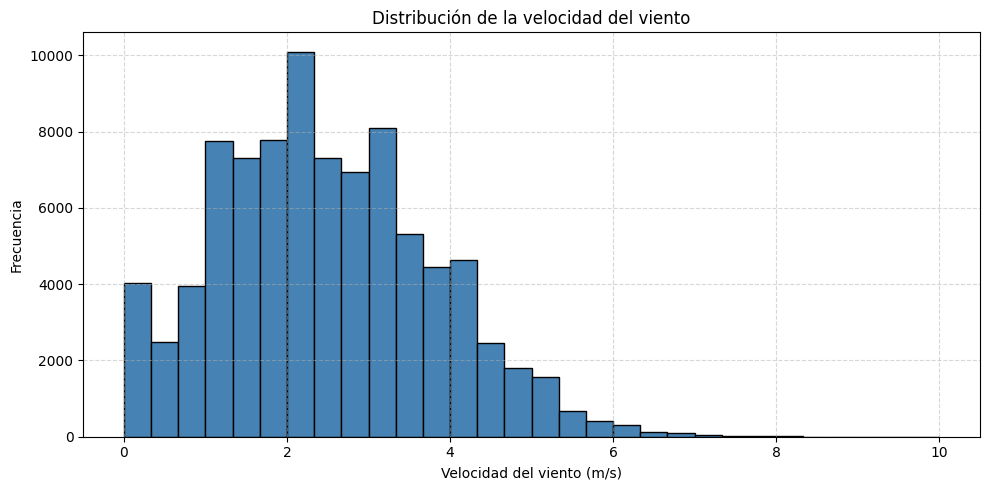

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df['velocidad_viento'], bins=30, color='steelblue', edgecolor='black')
plt.title('Distribución de la velocidad del viento')
plt.xlabel('Velocidad del viento (m/s)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

El histograma muestra que la mayoría de las observaciones de velocidad del viento se concentran entre 1.5 y 3.5 m/s, lo cual coincide con los cuartiles observados previamente. La distribución tiene una asimetría negativa leve, con una caída progresiva hacia la derecha.

Se observa una alta frecuencia de valores cercanos a 2 m/s, que representa el comportamiento más común del viento en el conjunto de datos. A medida que la velocidad aumenta, la frecuencia disminuye considerablemente, y se detectan algunos valores extremos por encima de 6 m/s, que podrían considerarse ráfagas atípicas o outliers.

En general, la distribución sugiere que el viento suele tener intensidades moderadas, lo que es relevante para evaluar la estabilidad y potencial de generación eólica.

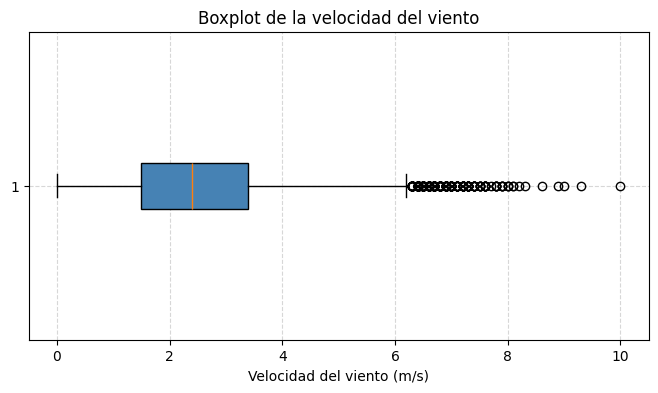

In [14]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['velocidad_viento'], vert=False, patch_artist=True, boxprops=dict(facecolor='steelblue'))
plt.title('Boxplot de la velocidad del viento')
plt.xlabel('Velocidad del viento (m/s)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

El boxplot permite observar la distribución de la velocidad del viento y detectar posibles valores atípicos. La caja representa el rango intercuartílico (Q1 a Q3), dentro del cual se encuentra el 50% central de los datos. La mediana, cercana a los 2.4 m/s, indica que la mayoría de las observaciones tienden a concentrarse en valores moderados.

Se observan múltiples outliers por encima de los 6 m/s, lo que refleja la presencia de ráfagas de viento significativamente más intensas que el promedio. Estos puntos extremos, aunque infrecuentes, son importantes de considerar ya que podrían afectar el rendimiento de modelos predictivos y representar condiciones críticas en aplicaciones reales como generación de energía o navegación aérea.

### Variable "direccion_viento"

In [15]:
faltantes = df['direccion_viento'].isnull().sum()
porcentaje = 100 * faltantes / len(df)

print(f"Valores faltantes en 'direccion_viento': {faltantes} ({porcentaje:.2f}%)")

Valores faltantes en 'direccion_viento': 0 (0.00%)


In [16]:
resumen = df['direccion_viento'].describe()
desviacion = df['direccion_viento'].std()

# Imprimir resumen
print(f"Media: {resumen['mean']:.2f}")
print(f"Desviación estándar: {desviacion:.2f}")
print(f"Mínimo: {resumen['min']:.2f}")
print(f"Q1 (25%): {resumen['25%']:.2f}")
print(f"Mediana (Q2): {resumen['50%']:.2f}")
print(f"Q3 (75%): {resumen['75%']:.2f}")
print(f"Máximo: {resumen['max']:.2f}")

Media: 0.41
Desviación estándar: 0.69
Mínimo: -1.00
Q1 (25%): -0.16
Mediana (Q2): 0.79
Q3 (75%): 0.97
Máximo: 1.00


La variable **direccion_viento** presenta una media de 0.41 y una mediana de 0.79, lo que indica una asimetría negativa leve en su distribución. La desviación estándar de 0.69 sugiere una variabilidad moderada en las direcciones del viento.

Los valores se encuentran normalizados en un rango de -1.00 a 1.00, lo que indica que esta variable probablemente fue transformada mediante una escalación previa (por ejemplo, usando escalado min-max o z-score), y no representa grados absolutos.

Los cuartiles muestran que:
* El 25% de los valores están por debajo de -0.16.
* El 50% (mediana) está por debajo de 0.79.
* El 75% de los datos están por debajo de 0.97.

Esto sugiere que la mayoría de las direcciones se concentran hacia valores positivos, pero con una fracción significativa en el rango negativo, lo que podría reflejar direcciones opuestas transformadas numéricamente.

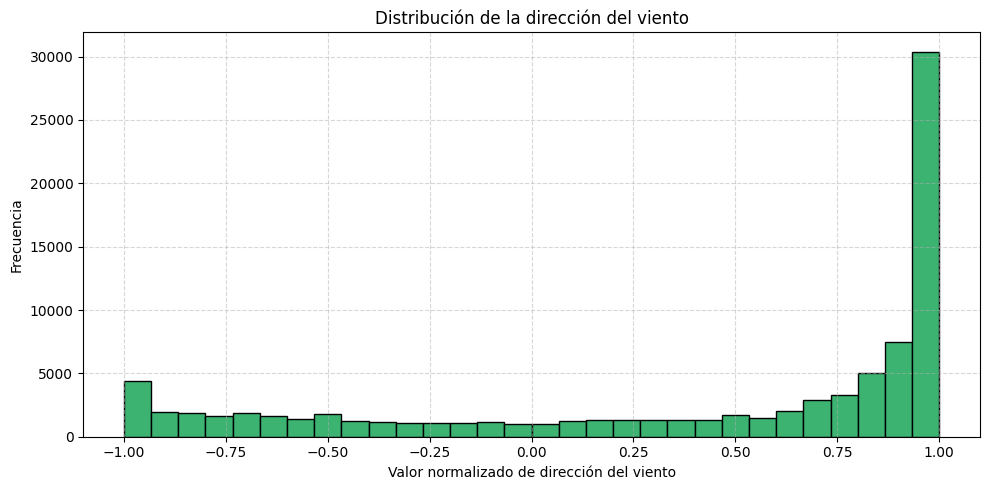

In [17]:
plt.figure(figsize=(10, 5))
plt.hist(df['direccion_viento'], bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Distribución de la dirección del viento')
plt.xlabel('Valor normalizado de dirección del viento')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

El histograma de la variable direccion_viento muestra una distribución claramente **asimétrica**, con una fuerte concentración de valores cercanos a 1.00, que representan direcciones del viento altas dentro del rango escalado. También se observa una menor concentración de valores en el extremo opuesto, cerca de -1.00.

Esta distribución sugiere que el viento en la mayoría de los casos tiende a venir desde una dirección dominante, codificada cerca del valor máximo normalizado, mientras que las direcciones opuestas son mucho menos frecuentes. Esto podría ser reflejo de condiciones geográficas o climáticas que favorecen un patrón de viento predominante.

### Variable "humedad_actual"

In [18]:
faltantes = df['humedad_actual'].isnull().sum()
porcentaje = 100 * faltantes / len(df)

print(f"Valores faltantes en 'humedad_actual': {faltantes} ({porcentaje:.2f}%)")

Valores faltantes en 'humedad_actual': 0 (0.00%)


In [19]:
resumen = df['humedad_actual'].describe()
desviacion = df['humedad_actual'].std()

print(f"Media: {resumen['mean']:.2f}")
print(f"Desviación estándar: {desviacion:.2f}")
print(f"Mínimo: {resumen['min']:.2f}")
print(f"Q1 (25%): {resumen['25%']:.2f}")
print(f"Mediana (Q2): {resumen['50%']:.2f}")
print(f"Q3 (75%): {resumen['75%']:.2f}")
print(f"Máximo: {resumen['max']:.2f}")

Media: 66.15
Desviación estándar: 19.99
Mínimo: 10.00
Q1 (25%): 51.00
Mediana (Q2): 68.00
Q3 (75%): 84.00
Máximo: 99.00


La variable **humedad_actual** presenta una media de 66.15% y una mediana de 68.00%, lo cual indica que los datos están bastante centrados en valores altos de humedad. La desviación estándar de 19.99% sugiere una variabilidad considerable, aunque dentro del rango típico para este tipo de variable.
* El mínimo es 10% y el máximo es 99%, por lo que los valores están dentro del rango físico esperable para humedad relativa (0% a 100%).
* El 25% de las observaciones están por debajo de 51%, mientras que el 75% están por debajo de 84%, lo que confirma una distribución sesgada hacia valores altos.

En conjunto, esto sugiere que el clima en la zona de medición es predominantemente húmedo, lo cual puede tener implicaciones relevantes para el comportamiento del viento o la generación de energía eólica.

In [20]:
plt.figure(figsize=(10, 5))
plt.hist(df['humedad_actual'], bins=30, color='deepskyblue', edgecolor='black')
plt.title('Distribución de la humedad relativa actual')
plt.xlabel('Humedad relativa (%)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

El histograma de la humedad relativa actual muestra una distribución asimétrica hacia la izquierda, con una clara concentración de valores entre 70% y 100%. Esto indica que, en la mayoría de los casos, el ambiente presenta niveles de humedad altos, lo cual es típico de climas húmedos o zonas costeras.

A medida que la humedad desciende, la frecuencia de observaciones disminuye gradualmente, siendo poco común encontrar valores por debajo del 30%. La distribución sugiere condiciones climáticas predominantemente húmedas, lo que puede influir en otros factores meteorológicos como la velocidad del viento o la probabilidad de lluvia.

### Variable "temperatura_max_ant"

In [21]:
faltantes = df['temperatura_max_ant'].isnull().sum()
porcentaje = 100 * faltantes / len(df)

print(f"Valores faltantes en 'temperatura_max_ant': {faltantes} ({porcentaje:.2f}%)")

Valores faltantes en 'temperatura_max_ant': 0 (0.00%)


In [22]:
resumen = df['temperatura_max_ant'].describe()
desviacion = df['temperatura_max_ant'].std()

print(f"Media: {resumen['mean']:.2f}")
print(f"Desviación estándar: {desviacion:.2f}")
print(f"Mínimo: {resumen['min']:.2f}")
print(f"Q1 (25%): {resumen['25%']:.2f}")
print(f"Mediana (Q2): {resumen['50%']:.2f}")
print(f"Q3 (75%): {resumen['75%']:.2f}")
print(f"Máximo: {resumen['max']:.2f}")

Media: 21.92
Desviación estándar: 3.72
Mínimo: 9.20
Q1 (25%): 19.20
Mediana (Q2): 21.40
Q3 (75%): 24.70
Máximo: 35.30


La variable temperatura_max_ant presenta una media de 21.92 °C y una mediana de 21.40 °C, lo que indica una distribución bastante simétrica, ya que ambos valores están muy próximos.

La desviación estándar de 3.72 °C muestra una variabilidad moderada en la temperatura máxima del día anterior. La mayoría de los valores se ubican entre 19.20 °C (Q1) y 24.70 °C (Q3), lo que sugiere que el 50% central de las observaciones se concentra en un rango de aproximadamente 5.5 grados.

El valor mínimo registrado es 9.20 °C, mientras que el máximo alcanza 35.30 °C, lo cual sugiere la posibilidad de algunas condiciones extremas (muy frías o muy calurosas), aunque no necesariamente atípicas.

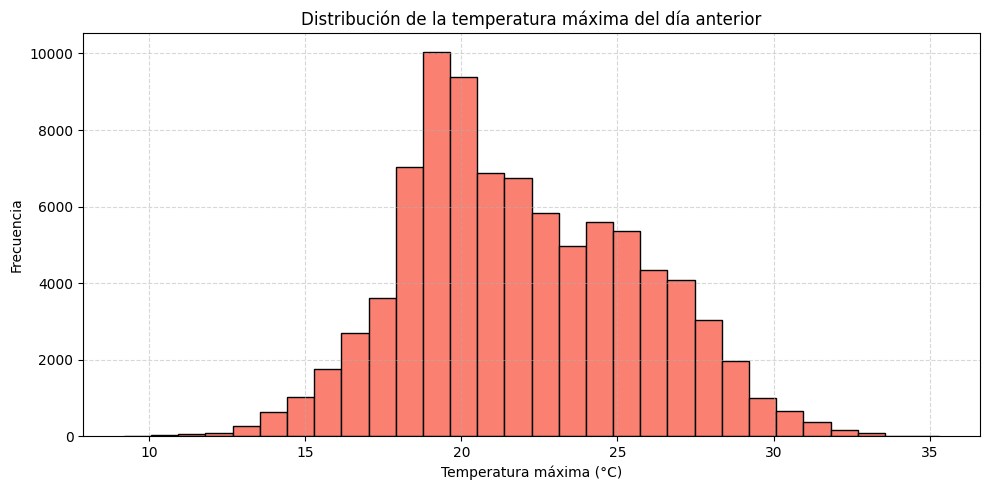

In [23]:
plt.figure(figsize=(10, 5))
plt.hist(df['temperatura_max_ant'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribución de la temperatura máxima del día anterior')
plt.xlabel('Temperatura máxima (°C)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

El histograma de la temperatura máxima del día anterior muestra una distribución aproximadamente normal, centrada alrededor de los 20–22 °C. Esto confirma lo observado previamente en las estadísticas descriptivas, donde la media y la mediana eran muy cercanas.

La mayoría de los valores se agrupan entre 18 °C y 25 °C, lo que indica que las condiciones térmicas máximas suelen ser moderadas. Sin embargo, se observa una cola derecha ligera, con valores que alcanzan hasta los 35.3 °C, lo que podría estar asociado a condiciones de calor extremo en algunos días específicos.

En general, no se evidencian outliers notables, y la variable parece bien distribuida para su uso en modelos de regresión.

### Variable "temperatura_min_ant"

In [24]:
faltantes = df['temperatura_min_ant'].isnull().sum()
porcentaje = 100 * faltantes / len(df)

print(f"Valores faltantes en 'temperatura_min_ant': {faltantes} ({porcentaje:.2f}%)")

Valores faltantes en 'temperatura_min_ant': 0 (0.00%)


In [25]:
resumen = df['temperatura_min_ant'].describe()
desviacion = df['temperatura_min_ant'].std()

print(f"Media: {resumen['mean']:.2f}")
print(f"Desviación estándar: {desviacion:.2f}")
print(f"Mínimo: {resumen['min']:.2f}")
print(f"Q1 (25%): {resumen['25%']:.2f}")
print(f"Mediana (Q2): {resumen['50%']:.2f}")
print(f"Q3 (75%): {resumen['75%']:.2f}")
print(f"Máximo: {resumen['max']:.2f}")

Media: 20.68
Desviación estándar: 3.51
Mínimo: 8.40
Q1 (25%): 18.40
Mediana (Q2): 20.20
Q3 (75%): 23.10
Máximo: 34.40


La temperatura mínima del día anterior presenta una media de 20.68 °C y una mediana de 20.20 °C, lo que sugiere una distribución ligeramente sesgada hacia la derecha, aunque en general bastante simétrica.

La desviación estándar de 3.51 °C indica una variabilidad moderada. La mayoría de los datos se encuentran entre 18.40 °C (Q1) y 23.10 °C (Q3), y tanto el mínimo (8.40 °C) como el máximo (34.40 °C) están dentro de rangos térmicos razonables, aunque los extremos podrían asociarse a días con condiciones climáticas atípicas.

Comparado con la temperatura máxima del día anterior (temperatura_max_ant), los valores son levemente más bajos, pero ambos mantienen un patrón similar de dispersión y tendencia central.


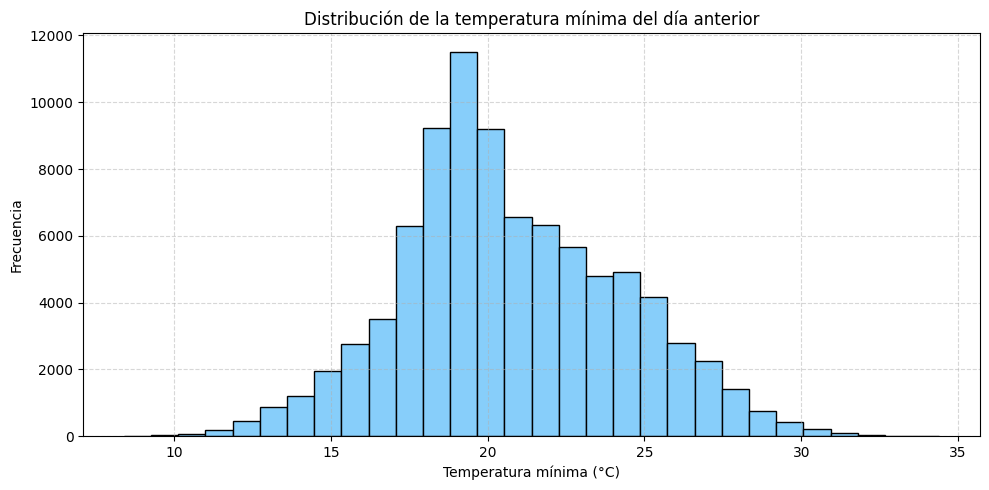

In [26]:
plt.figure(figsize=(10, 5))
plt.hist(df['temperatura_min_ant'], bins=30, color='lightskyblue', edgecolor='black')
plt.title('Distribución de la temperatura mínima del día anterior')
plt.xlabel('Temperatura mínima (°C)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

El histograma de temperatura_min_ant muestra una distribución aproximadamente normal, centrada alrededor de los 20 °C, con una ligera asimetría a la derecha, que se refleja en la mayor presencia de valores en el rango de 20–25 °C.

La mayoría de los datos se concentran entre 15 °C y 25 °C, lo que indica que las temperaturas mínimas suelen mantenerse en un rango cálido-moderado. Existen algunos valores más bajos cercanos a 8.4 °C, y algunos extremos hasta 34.4 °C, aunque estos últimos son muy poco frecuentes y no parecen representar outliers visuales graves.

En conjunto con la temperatura máxima, esta variable contribuye a identificar la amplitud térmica diaria, que puede influir directamente en la dinámica atmosférica y, por tanto, en la velocidad del viento.


### temperatura_max_ant VS temperatura_min_ant

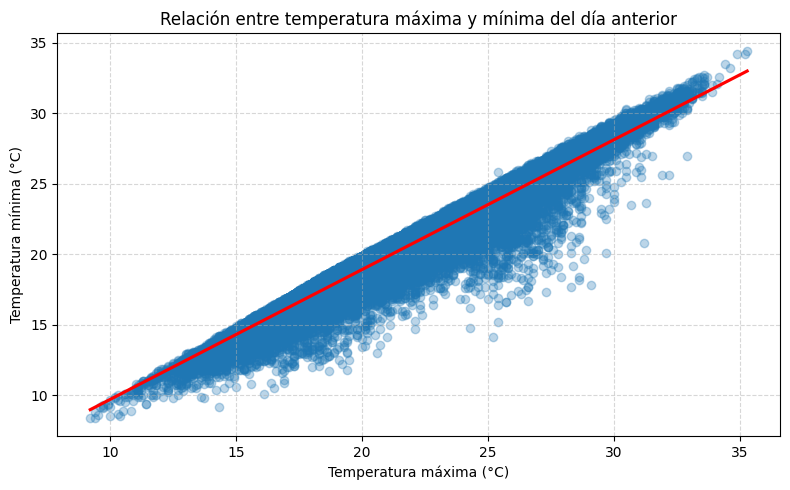

In [27]:
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.regplot(
    x='temperatura_max_ant',
    y='temperatura_min_ant',
    data=df,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title('Relación entre temperatura máxima y mínima del día anterior')
plt.xlabel('Temperatura máxima (°C)')
plt.ylabel('Temperatura mínima (°C)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Se observa una relación lineal positiva fuerte entre la temperatura máxima y mínima del día anterior. Esto indica que los días más cálidos también suelen registrar temperaturas mínimas más elevadas. La nube de puntos está muy concentrada alrededor de la línea de regresión, lo que sugiere baja dispersión y una correlación consistente entre ambas variables térmicas.

### humedad_actual VS temperatura_min_ant

In [28]:
plt.figure(figsize=(8, 5))
sns.regplot(
    x='humedad_actual',
    y='temperatura_min_ant',
    data=df,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title('Relación entre humedad relativa y temperatura mínima del día anterior')
plt.xlabel('Humedad relativa (%)')
plt.ylabel('Temperatura mínima (°C)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


El gráfico muestra una relación inversa entre la humedad relativa y la temperatura mínima del día anterior. A medida que aumenta la humedad, la temperatura mínima tiende a disminuir ligeramente. La dispersión es amplia, lo que sugiere que la relación no es fuerte, pero sí consistente. Esta tendencia podría explicarse por condiciones atmosféricas en las que la humedad está asociada a fenómenos como nubosidad o lluvias nocturnas, que impiden que la temperatura se mantenga elevada.

### direccion_viento VS velocidad_viento

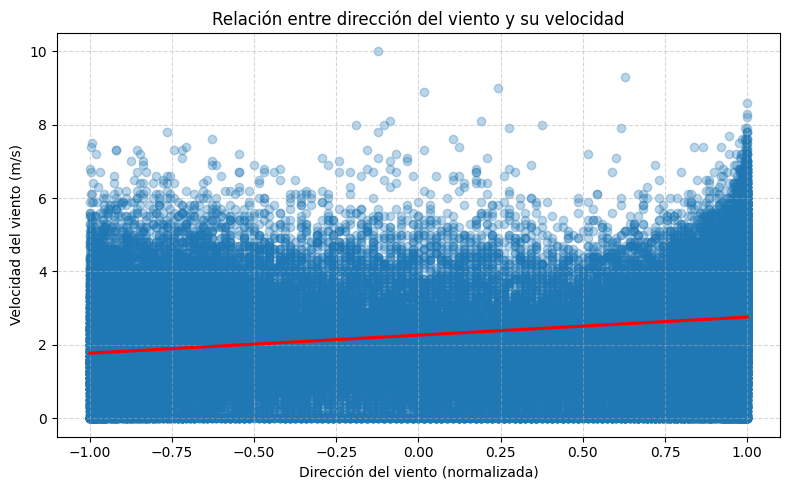

In [29]:
plt.figure(figsize=(8, 5))
sns.regplot(
    x='direccion_viento',
    y='velocidad_viento',
    data=df,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title('Relación entre dirección del viento y su velocidad')
plt.xlabel('Dirección del viento (normalizada)')
plt.ylabel('Velocidad del viento (m/s)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

El gráfico muestra una relación muy débilmente positiva entre la dirección del viento (normalizada) y su velocidad. La nube de puntos es bastante dispersa, lo que indica alta variabilidad en la velocidad del viento para todas las direcciones posibles. Sin embargo, se observa una ligera tendencia creciente hacia los extremos positivos de la dirección, lo que podría sugerir que ciertos rangos de dirección están asociados a vientos más intensos. Aun así, no parece haber una relación lineal fuerte entre ambas variables.

### temperatura_max_ant VS velocidad_viento

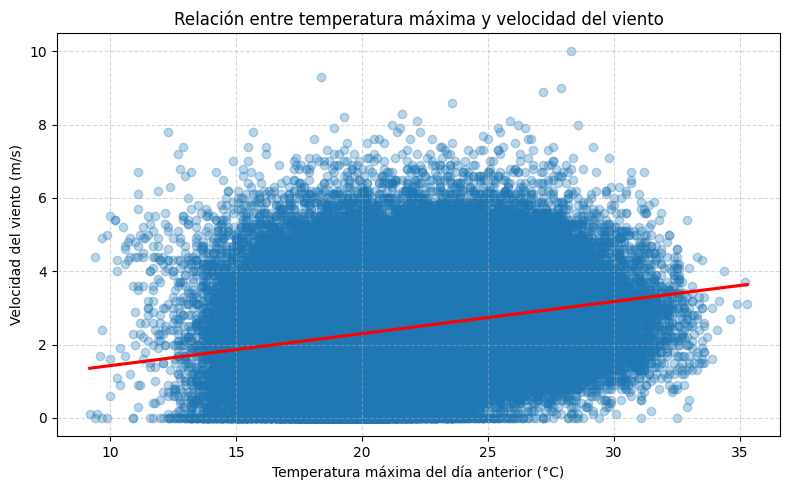

In [30]:
plt.figure(figsize=(8, 5))
sns.regplot(
    x='temperatura_max_ant',
    y='velocidad_viento',
    data=df,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title('Relación entre temperatura máxima y velocidad del viento')
plt.xlabel('Temperatura máxima del día anterior (°C)')
plt.ylabel('Velocidad del viento (m/s)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

El gráfico revela una relación positiva débil entre la temperatura máxima del día anterior y la velocidad del viento. Aunque existe una ligera tendencia ascendente, la dispersión de los puntos es amplia, lo que indica alta variabilidad en la velocidad del viento para cualquier valor de temperatura. Esta relación puede estar influenciada por factores externos como presión atmosférica o características topográficas, pero sugiere que en días más cálidos podrían generarse condiciones más dinámicas en la atmósfera.

## Modelos de Regresión con T=7

### Preparar los datos

In [31]:
df.columns

Index(['hora', 'direccion_viento', 'velocidad_viento', 'humedad_max_ant',
       'humedad_min_ant', 'temperatura_max_ant', 'temperatura_min_ant',
       'humedad_actual', 'presion_estacion', 'precipitacion', 'rafaga_maxima',
       'presion_max_ant', 'presion_min_ant', 'timestamp'],
      dtype='object')

In [32]:
df['fecha'] = df['timestamp'].dt.date
df.head(10)

hora  direccion_viento  velocidad_viento  humedad_max_ant  \
0  12:00          0.809017               1.8             69.0   
1  13:00          0.965926               2.7             62.0   
2  14:00          0.891007               2.0             56.0   
3  15:00          0.848048               2.5             52.0   
4  16:00          0.224951               2.4             50.0   
5  17:00          0.034899               1.8             48.0   
6  18:00          0.819152               1.8             46.0   
7  19:00          0.798636               1.1             43.0   
8  20:00          0.945519               1.5             45.0   
9  21:00         -0.292372               1.3             59.0   

   humedad_min_ant  temperatura_max_ant  temperatura_min_ant  humedad_actual  \
0             60.0                 22.6                 20.7            61.0   
1             55.0                 24.2                 22.5            55.0   
2             50.0                 25.5                 24.3            51.0   
3             44.0                 27.4                 25.0            44.0   
4             43.0                 27.1                 25.5            46.0   
5             41.0                 27.4                 25.9            45.0   
6             36.0                 28.3                 26.8            38.0   
7             37.0                 28.1                 26.6            41.0   
8             38.0                 27.4                 25.8            44.0   
9             45.0                 25.8                 23.6            51.0   

   presion_estacion  precipitacion  rafaga_maxima  presion_max_ant  \
0             888.2            0.0            3.8            888.2   
1             888.4            0.0            4.7            888.4   
2             888.1            0.0            4.9            888.4   
3             887.4            0.0            5.8            888.1   
4             886.5            0.0            5.8            887.4   
5             885.9            0.0            4.3            886.5   
6             885.5            0.0            6.3            885.9   
7             885.6            0.0            3.8            885.6   
8             885.9            0.0            3.0            885.9   
9             886.2            0.0            3.2            886.2   

   presion_min_ant           timestamp       fecha  
0            887.7 2020-01-01 12:00:00  2020-01-01  
1            888.2 2020-01-01 13:00:00  2020-01-01  
2            888.1 2020-01-01 14:00:00  2020-01-01  
3            887.4 2020-01-01 15:00:00  2020-01-01  
4            886.5 2020-01-01 16:00:00  2020-01-01  
5            885.9 2020-01-01 17:00:00  2020-01-01  
6            885.5 2020-01-01 18:00:00  2020-01-01  
7            885.4 2020-01-01 19:00:00  2020-01-01  
8            885.5 2020-01-01 20:00:00  2020-01-01  
9            885.8 2020-01-01 21:00:00  2020-01-01

In [33]:
conteo_por_dia = df.groupby('fecha').size()
dias_completos = conteo_por_dia[conteo_por_dia == 24].index
df_filtrado = df[df['fecha'].isin(dias_completos)].copy()
print(f"Días completos conservados: {len(dias_completos)}")
print(f"Filas en df_filtrado: {df_filtrado.shape[0]}")

Días completos conservados: 3653
Filas en df_filtrado: 87672


### Crear ventana de predicción T=7

In [34]:
def generar_ventanas_por_dia(df, T_dias=7):
    ventanas = []
    df = df.copy()
    dias = sorted(df['fecha'].unique())
    
    for i in range(len(dias) - T_dias - 1):
        dias_train = dias[i:i + T_dias]
        dia_test = dias[i + T_dias]

        df_train = df[df['fecha'].isin(dias_train)]
        df_test = df[df['fecha'] == dia_test]

        columnas_X = df.select_dtypes(include=['float64', 'int64']).columns.difference(['velocidad_viento'])

        X_train = df_train[columnas_X]
        y_train = df_train['velocidad_viento']

        X_test = df_test[columnas_X]
        y_test = df_test['velocidad_viento']

        ventanas.append((X_train, y_train, X_test, y_test))

    return ventanas

# Generamos las ventanas con T=7 días
ventanas_T7 = generar_ventanas_por_dia(df_filtrado, T_dias=7)
print(f"Ventanas generadas: {len(ventanas_T7)}")

Ventanas generadas: 3645


#### Regresión lineal 

In [36]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # type: ignore
from tqdm import tqdm # type: ignore
from statsmodels.stats.diagnostic import acorr_ljungbox # type: ignore

# Crear lista para almacenar resultados
resultados_lr_metr = []

# Recorrer cada ventana y entrenar modelo
for i, (X_train, y_train, X_test, y_test) in enumerate(tqdm(ventanas_T7)):
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Filtrar y_test != 0 para MAPE
    mask = y_test != 0
    mape = np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100 if np.any(mask) else np.nan

    r2 = r2_score(y_test, y_pred)

    # Prueba de Ljung-Box para residuos
    residuos = y_test - y_pred
    lb_test = acorr_ljungbox(residuos, lags=[10], return_df=True)
    p_value = lb_test['lb_pvalue'].iloc[0]

    resultados_lr_metr.append({
        'ventana': i,
        'MAPE': mape,
        'MAE': mae,
        'RMSE': rmse,
        'MSE': mse,
        'R2': r2,
        'LjungBox_p': p_value
    })

# Convertir resultados a DataFrame
df_resultados_lr = pd.DataFrame(resultados_lr_metr)

# Mostrar promedios de las métricas
promedios = df_resultados_lr[['MAPE', 'MAE', 'RMSE', 'MSE', 'R2', 'LjungBox_p']].mean()
print("Promedios del modelo de Regresión Lineal (T=7 días):")
print(promedios)

100%|██████████| 3645/3645 [00:05<00:00, 711.42it/s]

Promedios del modelo de Regresión Lineal (T=7 días):
MAPE          34.672547
MAE            0.495991
RMSE           0.668535
MSE            1.650167
R2            -0.379356
LjungBox_p     0.498276
dtype: float64


#### K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor # type: ignore
# Rejilla de hiperparámetros
vecinos = [3, 5, 7, 9]
pesos = ['uniform', 'distance']
metricas = ['euclidean', 'manhattan', 'chebyshev']

combinaciones = [(k, w, m) for k in vecinos for w in pesos for m in metricas]

mejor_rmse = float('inf')
mejor_config = {}
mejores_metricas = {}

# Iteramos con barra de progreso
for k, w, m in tqdm(combinaciones, desc="🔍 Buscando la mejor combinación KNN"):
    rmses, maes, mapes, mses, r2s, lbps = [], [], [], [], [], []

    for X_train, y_train, X_test, y_test in ventanas_T7:
        X_train = X_train.select_dtypes(include=[np.number])
        X_test = X_test.select_dtypes(include=[np.number])

        modelo = KNeighborsRegressor(n_neighbors=k, weights=w, metric=m)
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

        # Filtramos para evitar división por cero en MAPE
        mask = y_test != 0
        y_test_filtrado = y_test[mask]
        y_pred_filtrado = y_pred[mask]

        rmse = mean_squared_error(y_test, y_pred) ** 0.5
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mape = np.mean(np.abs((y_test_filtrado - y_pred_filtrado) / y_test_filtrado)) * 100
        r2 = r2_score(y_test, y_pred)

        residuos = y_test - y_pred
        lb_pvalue = acorr_ljungbox(residuos, lags=[10], return_df=True)['lb_pvalue'].iloc[0]

        rmses.append(rmse)
        maes.append(mae)
        mapes.append(mape)
        mses.append(mse)
        r2s.append(r2)
        lbps.append(lb_pvalue)

    promedio_rmse = np.mean(rmses)

    if promedio_rmse < mejor_rmse:
        mejor_rmse = promedio_rmse
        mejor_config = {'n_neighbors': k, 'weights': w, 'metric': m}
        mejores_metricas = {
            'RMSE': promedio_rmse,
            'MAE': np.mean(maes),
            'MAPE': np.mean(mapes),
            'MSE': np.mean(mses),
            'R2': np.mean(r2s),
            'LjungBox_p': np.mean(lbps)
        }

# Mostrar resultados finales
print(" Mejor combinación de hiperparámetros:")
print(mejor_config)
print("\n Métricas promedio de la mejor combinación (basado en RMSE):")
for metrica, valor in mejores_metricas.items():
    print(f"{metrica}: {valor:.4f}")

🔍 Buscando la mejor combinación KNN: 100%|██████████| 24/24 [02:01<00:00,  5.06s/it]

✅ Mejor combinación de hiperparámetros:
{'n_neighbors': 5, 'weights': 'distance', 'metric': 'euclidean'}

📊 Métricas promedio de la mejor combinación (basado en RMSE):
RMSE: 0.9948
MAE: 0.8042
MAPE: 56.2803
MSE: 1.0784
R2: -0.1089
LjungBox_p: 0.2938


#### Ridge

In [ ]:
from sklearn.linear_model import Ridge # type: ignore
# Hiperparámetros a evaluar
alphas = [0.01, 0.1, 1.0, 10.0]

# Guardar resultados
mejores_resultados = None
mejor_alpha = None
mejor_rmse = np.inf

print(" Buscando la mejor combinación para Ridge:")
for alpha in tqdm(alphas):
    resultados_ridge = []
    
    for X_train, y_train, X_test, y_test in ventanas_T7:
        X_train = X_train.select_dtypes(include=[np.number])
        X_test = X_test.select_dtypes(include=[np.number])

        modelo = Ridge(alpha=alpha)
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

        # Filtrar ceros en y_test para MAPE
        mask = y_test != 0
        y_test_filtrado = y_test[mask]
        y_pred_filtrado = y_pred[mask]

        rmse = mean_squared_error(y_test, y_pred) ** 0.5
        mae = mean_absolute_error(y_test, y_pred)
        mape = np.mean(np.abs((y_test_filtrado - y_pred_filtrado) / y_test_filtrado)) * 100
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        try:
            ljung_p = acorr_ljungbox(y_test - y_pred, lags=[10], return_df=True)['lb_pvalue'].iloc[0]
        except:
            ljung_p = np.nan
        
        resultados_ridge.append({
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape,
            'MSE': mse,
            'R2': r2,
            'LjungBox_p': ljung_p
        })

    df_resultados = pd.DataFrame(resultados_ridge)
    promedio_rmse = df_resultados['RMSE'].mean()

    if promedio_rmse < mejor_rmse:
        mejor_rmse = promedio_rmse
        mejores_resultados = df_resultados
        mejor_alpha = alpha

# Mostrar resultados
print(f"\n Mejor alpha encontrado: {mejor_alpha}")
print("\n Métricas promedio del mejor modelo Ridge:")
print(mejores_resultados.mean())

🔎 Buscando la mejor combinación para Ridge:


  0%|          | 0/4 [00:00<?, ?it/s]/opt/miniconda3/envs/parcial_venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/parcial_venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/parcial_venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/parcial_venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/parcial_venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/parcial_venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/pa


✅ Mejor alpha encontrado: 10.0

📊 Métricas promedio del mejor modelo Ridge:
RMSE           0.609490
MAE            0.473043
MAPE          33.462730
MSE            0.423756
R2             0.557811
LjungBox_p     0.495045
dtype: float64


#### Lasso

In [ ]:
from sklearn.linear_model import Lasso # type: ignore
# Hiperparámetros a evaluar
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}

mejores_resultados = None
mejor_alpha = None

print(" Buscando la mejor combinación para Lasso...")

for alpha in tqdm(param_grid['alpha']):
    resultados = []
    
    for i, (X_train, y_train, X_test, y_test) in enumerate(ventanas_T7):
        X_train = X_train.select_dtypes(include=[np.number])
        X_test = X_test.select_dtypes(include=[np.number])

        modelo = Lasso(alpha=alpha, max_iter=10000)
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

        # Excluir y_test = 0 para el MAPE
        mask = y_test != 0
        y_test_filtrado = y_test[mask]
        y_pred_filtrado = y_pred[mask]

        rmse = mean_squared_error(y_test, y_pred) ** 0.5
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mape = np.mean(np.abs((y_test_filtrado - y_pred_filtrado) / y_test_filtrado)) * 100

        r2 = r2_score(y_test, y_pred)
        lb_pvalue = acorr_ljungbox(y_test - y_pred, lags=[10], return_df=True)['lb_pvalue'].iloc[0]

        resultados.append({
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape,
            'MSE': mse,
            'R2': r2,
            'LjungBox_p': lb_pvalue
        })

    df_resultados = pd.DataFrame(resultados)
    promedio_rmse = df_resultados['RMSE'].mean()

    if mejores_resultados is None or promedio_rmse < pd.DataFrame(mejores_resultados)['RMSE'].mean():
        mejores_resultados = resultados
        mejor_alpha = alpha

# Mostrar resultados finales
print(f"\n Mejor alpha encontrado: {mejor_alpha}")
df_mejor = pd.DataFrame(mejores_resultados)
print("\n Métricas promedio del mejor modelo Lasso:")
print(df_mejor.mean())

🔍 Buscando la mejor combinación para Lasso...


100%|██████████| 5/5 [00:40<00:00,  8.08s/it]


✅ Mejor alpha encontrado: 0.01

📊 Métricas promedio del mejor modelo Lasso:
RMSE           0.609073
MAE            0.472560
MAPE          33.370140
MSE            0.415784
R2             0.567384
LjungBox_p     0.498580
dtype: float64


#### Decision Tree Regressor (CART)

In [ ]:
from sklearn.tree import DecisionTreeRegressor # type: ignore
# Definir la grilla de hiperparámetros
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Lista para guardar resultados
mejores_resultados = []
mejor_rmse = float('inf')
mejor_comb = None
mejor_metricas = None

# Probar cada combinación de hiperparámetros
print("Buscando la mejor combinación para Decision Tree...")
for max_depth in param_grid['max_depth']:
    for min_split in param_grid['min_samples_split']:
        for min_leaf in param_grid['min_samples_leaf']:
            resultados = []

            for X_train, y_train, X_test, y_test in tqdm(ventanas_T7):
                X_train = X_train.select_dtypes(include=[np.number])
                X_test = X_test.select_dtypes(include=[np.number])

                modelo = DecisionTreeRegressor(
                    max_depth=max_depth,
                    min_samples_split=min_split,
                    min_samples_leaf=min_leaf,
                    random_state=42
                )
                modelo.fit(X_train, y_train)
                y_pred = modelo.predict(X_test)

                # MAPE filtrando ceros
                mask = y_test != 0
                y_test_filtrado = y_test[mask]
                y_pred_filtrado = y_pred[mask]
                mape = np.mean(np.abs((y_test_filtrado - y_pred_filtrado) / y_test_filtrado)) * 100 if len(y_test_filtrado) > 0 else np.nan

                rmse = mean_squared_error(y_test, y_pred) ** 0.5
                mae = mean_absolute_error(y_test, y_pred)
                mse = mean_squared_error(y_test, y_pred)
                r2 = r2_score(y_test, y_pred)
                lb_pvalue = acorr_ljungbox(y_test - y_pred, lags=[10], return_df=True)['lb_pvalue'].iloc[0]

                resultados.append({
                    'RMSE': rmse,
                    'MAE': mae,
                    'MAPE': mape,
                    'MSE': mse,
                    'R2': r2,
                    'LjungBox_p': lb_pvalue
                })

            df_resultados = pd.DataFrame(resultados)
            promedio_rmse = df_resultados['RMSE'].mean()

            if promedio_rmse < mejor_rmse:
                mejor_rmse = promedio_rmse
                mejor_comb = {
                    'max_depth': max_depth,
                    'min_samples_split': min_split,
                    'min_samples_leaf': min_leaf
                }
                mejor_metricas = df_resultados.mean()

# Mostrar resultados
print("Mejor combinación de hiperparámetros:")
print(mejor_comb)
print("\nMétricas promedio de la mejor combinación:")
print(mejor_metricas)

🔍 Buscando la mejor combinación para Decision Tree...


100%|██████████| 3645/3645 [00:08<00:00, 426.75it/s]

✅ Mejor combinación de hiperparámetros:
{'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 5}

📊 Métricas promedio de la mejor combinación:
RMSE           0.719841
MAE            0.564697
MAPE          37.857758
MSE            0.551318
R2             0.430709
LjungBox_p     0.476469
dtype: float64


#### Random Forest (RF)

In [ ]:
from sklearn.ensemble import RandomForestRegressor # type: ignore
from itertools import product

# Grilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

combinaciones = list(product(
    param_grid['n_estimators'],
    param_grid['max_depth'],
    param_grid['min_samples_split'],
    param_grid['min_samples_leaf'],
    param_grid['max_features']
))

mejor_rmse = float('inf')
mejor_config = None
mejores_metricas = {}

print("🌲 Buscando la mejor combinación para Random Forest...")
for n_est, max_d, min_split, min_leaf, max_feat in tqdm(combinaciones):
    rmses, maes, mapes, mses, r2s, lbps = [], [], [], [], [], []

    for X_train, y_train, X_test, y_test in ventanas_T7:
        X_train = X_train.select_dtypes(include=[np.number])
        X_test = X_test.select_dtypes(include=[np.number])

        modelo = RandomForestRegressor(
            n_estimators=n_est,
            max_depth=max_d,
            min_samples_split=min_split,
            min_samples_leaf=min_leaf,
            max_features=max_feat,
            random_state=42,
            n_jobs=-1
        )
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

        mask = y_test != 0
        y_test_f = y_test[mask]
        y_pred_f = y_pred[mask]
        mape = np.mean(np.abs((y_test_f - y_pred_f) / y_test_f)) * 100 if len(y_test_f) > 0 else np.nan

        rmse = mean_squared_error(y_test, y_pred) ** 0.5
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        lb_pvalue = acorr_ljungbox(y_test - y_pred, lags=[10], return_df=True)['lb_pvalue'].iloc[0]

        rmses.append(rmse)
        maes.append(mae)
        mapes.append(mape)
        mses.append(mse)
        r2s.append(r2)
        lbps.append(lb_pvalue)

    promedio_rmse = np.mean(rmses)

    if promedio_rmse < mejor_rmse:
        mejor_rmse = promedio_rmse
        mejor_config = {
            'n_estimators': n_est,
            'max_depth': max_d,
            'min_samples_split': min_split,
            'min_samples_leaf': min_leaf,
            'max_features': max_feat
        }
        mejores_metricas = {
            'RMSE': promedio_rmse,
            'MAE': np.mean(maes),
            'MAPE': np.mean(mapes),
            'MSE': np.mean(mses),
            'R2': np.mean(r2s),
            'LjungBox_p': np.mean(lbps)
        }

print("Mejor combinación de hiperparámetros:")
print(mejor_config)
print("\nMétricas promedio de la mejor combinación (basado en RMSE):")
for metrica, valor in mejores_metricas.items():
    print(f"{metrica}: {valor:.4f}")

🌲 Buscando la mejor combinación para Random Forest...


100%|██████████| 32/32 [3:35:18<00:00, 403.70s/it]   

✅ Mejor combinación de hiperparámetros:
{'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}

📊 Métricas promedio de la mejor combinación (basado en RMSE):
RMSE: 0.7282
MAE: 0.5776
MAPE: 42.4896
MSE: 0.5745
R2: 0.4287
LjungBox_p: 0.3767


#### Extreme Gradient Boosting (XGBoost)

In [ ]:
from xgboost import XGBRegressor # type: ignore

# Grilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.1, 0.3],
    'subsample': [0.8, 1.0]
}

# Combinaciones de hiperparámetros
combinaciones = [
    (n, d, lr, s)
    for n in param_grid['n_estimators']
    for d in param_grid['max_depth']
    for lr in param_grid['learning_rate']
    for s in param_grid['subsample']
]

mejor_rmse = float('inf')
mejor_config = {}
mejores_metricas = {}

# Iterar sobre todas las combinaciones
for n, d, lr, s in tqdm(combinaciones, desc=" Buscando mejor combinación XGBoost"):
    rmses, maes, mapes, mses, r2s, lbps = [], [], [], [], [], []

    for X_train, y_train, X_test, y_test in ventanas_T7:
        X_train = X_train.select_dtypes(include=[np.number])
        X_test = X_test.select_dtypes(include=[np.number])

        modelo = XGBRegressor(n_estimators=n, max_depth=d, learning_rate=lr, subsample=s, verbosity=0)
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

        rmse = mean_squared_error(y_test, y_pred) ** 0.5
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mape = np.mean(np.abs((y_test - y_pred) / y_test.replace(0, np.nan))) * 100
        r2 = r2_score(y_test, y_pred)
        lb_pvalue = acorr_ljungbox(y_test - y_pred, lags=[10], return_df=True)['lb_pvalue'].iloc[0]

        rmses.append(rmse)
        maes.append(mae)
        mapes.append(mape)
        mses.append(mse)
        r2s.append(r2)
        lbps.append(lb_pvalue)

    promedio_rmse = np.mean(rmses)

    if promedio_rmse < mejor_rmse:
        mejor_rmse = promedio_rmse
        mejor_config = {
            'n_estimators': n,
            'max_depth': d,
            'learning_rate': lr,
            'subsample': s
        }
        mejores_metricas = {
            'RMSE': promedio_rmse,
            'MAE': np.mean(maes),
            'MAPE': np.mean(mapes),
            'MSE': np.mean(mses),
            'R2': np.mean(r2s),
            'LjungBox_p': np.mean(lbps)
        }

# Mostrar resultados
print("Mejor combinación de hiperparámetros:")
print(mejor_config)

print("\nMétricas promedio del mejor modelo XGBoost:")
for metrica, valor in mejores_metricas.items():
    print(f"{metrica}: {valor:.4f}")

🔍 Buscando mejor combinación XGBoost: 100%|██████████| 36/36 [7:14:48<00:00, 724.69s/it]   

✅ Mejor combinación de hiperparámetros:
{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 0.8}

📊 Métricas promedio del mejor modelo XGBoost:
RMSE: 0.6395
MAE: 0.5023
MAPE: 35.2491
MSE: 0.4370
R2: 0.5581
LjungBox_p: 0.4602


#### Support Vector Regressor (SVR)

In [ ]:
from sklearn.svm import SVR # type: ignore
from itertools import product

# Hiperparámetros para SVR con kernel RBF
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1],
    'gamma': ['scale', 'auto']
}

# Crear todas las combinaciones posibles
combinaciones = list(product(param_grid['C'], param_grid['epsilon'], param_grid['gamma']))

# Variables para guardar los mejores resultados
mejor_rmse = float('inf')
mejor_config = {}
mejores_metricas = {}

# Proceso de búsqueda
for C_val, eps, gam in tqdm(combinaciones, desc="🔍 Buscando la mejor combinación para SVR (RBF)"):
    rmses, maes, mapes, mses, r2s, lbps = [], [], [], [], [], []

    for X_train, y_train, X_test, y_test in ventanas_T7:
        X_train = X_train.select_dtypes(include=[np.number])
        X_test = X_test.select_dtypes(include=[np.number])

        modelo = SVR(kernel='rbf', C=C_val, epsilon=eps, gamma=gam)
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

        # MAPE filtrando ceros
        mask = y_test != 0
        y_test_f = y_test[mask]
        y_pred_f = y_pred[mask]
        mape = np.mean(np.abs((y_test_f - y_pred_f) / y_test_f)) * 100 if len(y_test_f) > 0 else np.nan

        rmse = mean_squared_error(y_test, y_pred) ** 0.5
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        lb_pvalue = acorr_ljungbox(y_test - y_pred, lags=[10], return_df=True)['lb_pvalue'].iloc[0]

        rmses.append(rmse)
        maes.append(mae)
        mapes.append(mape)
        mses.append(mse)
        r2s.append(r2)
        lbps.append(lb_pvalue)

    promedio_rmse = np.mean(rmses)

    if promedio_rmse < mejor_rmse:
        mejor_rmse = promedio_rmse
        mejor_config = {
            'C': C_val,
            'epsilon': eps,
            'gamma': gam
        }
        mejores_metricas = {
            'RMSE': promedio_rmse,
            'MAE': np.mean(maes),
            'MAPE': np.mean(mapes),
            'MSE': np.mean(mses),
            'R2': np.mean(r2s),
            'LjungBox_p': np.mean(lbps)
        }

# Mostrar resultados finales
print("Mejor combinación de hiperparámetros para SVR (RBF):")
print(mejor_config)
print("\nMétricas promedio de la mejor combinación:")
for metrica, valor in mejores_metricas.items():
    print(f"{metrica}: {valor:.4f}")

🔍 Buscando la mejor combinación para SVR (RBF): 100%|██████████| 12/12 [01:20<00:00,  6.72s/it]

Mejor combinación de hiperparámetros para SVR (RBF):
{'C': 10, 'epsilon': 0.01, 'gamma': 'auto'}

Métricas promedio de la mejor combinación:
RMSE: 1.0634
MAE: 0.8610
MAPE: 67.1309
MSE: 1.2295
R2: -0.2118
LjungBox_p: 0.2333
